In [290]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import *
from math import sqrt
from tqdm import tqdm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display_html

In [158]:
Data = pd.DataFrame.from_csv("normalizedData.csv")

In [159]:
Data

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Num_sec_midnight,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,WeekDay,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,3.301180,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:10:00,60,3.301180,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,...,140.474197,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:20:00,50,3.301180,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:30:00,50,4.561263,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:40:00,60,4.561263,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:50:00,50,4.561263,-1.118616,1.449232,-0.520398,1.002400,-1.235032,1.748563,-0.962039,1.544022,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:00:00,60,5.821345,-1.118616,1.383894,-0.520398,1.002400,-1.235032,1.738321,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:10:00,60,5.821345,-1.139371,1.331958,-0.520398,1.002400,-1.264941,1.738321,-0.962039,1.574735,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:20:00,60,4.561263,-1.180880,1.341382,-0.520398,0.986019,-1.264941,1.704523,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0


In [166]:
train = pd.DataFrame.from_csv("train.csv")
test = pd.DataFrame.from_csv("test.csv")
X_train = train.iloc[:,:len(train.columns)-1]
y_train = train.iloc[:,len(train.columns)-1]
X_test = test.iloc[:,:len(test.columns)-1]
y_test = test.iloc[:,len(test.columns)-1]

# Linear Regression

In [196]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
summary = pd.DataFrame(index={'MAE', 'MAPE', 'RMSE', 'R2'})
summary_test = pd.DataFrame(index={'MAE', 'MAPE', 'RMSE', 'R2'})
def determineAnalysis(true, pred, regressor): 
    mae = mean_absolute_error(true, pred)
    rmse = sqrt(mean_squared_error(true, pred))
    r2 = r2_score(true, pred)
    true, pred = np.array(true), np.array(pred)
    mape = np.mean(np.abs((true - pred) / true)) * 100
    n =len(X_train)
#     r2_adj =1- (1-r2)*(n-1)/(n-(len(regressor.estimator_params)+1))
#     fi = regressor.feature_importances_
    print('Mean absolute error is ',mae)
    print('Mean absolute percentage error is ',mape)
    print('Root mean squared error is ',rmse)
    print('RSquare is ',r2)
#     print('RSquare adjusted ',r2_adj)
#     print('Feature importance ',fi)
    return mae,mape,rmse,r2

pred = lm.predict(X_train)
mae,mape,rmse,r2 = determineAnalysis(y_train, pred, lm)
summary['Linear'] = [mae,mape,rmse,r2]

Mean absolute error is  53.2049408697
Mean absolute percentage error is  61.3771334936
Root mean squared error is  94.33839452320886
RSquare is  0.170315956088


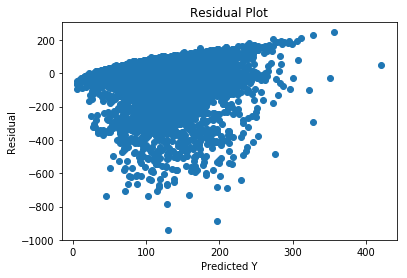

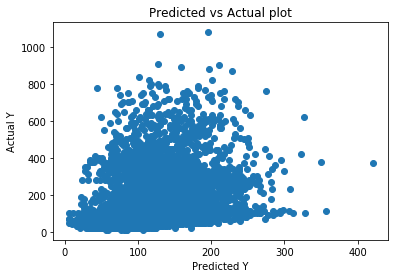

In [211]:
def plot_trend(predict, y, title):
    plt.xticks(rotation=45)
    plt.plot(y.as_matrix(), color='b', marker='o', linestyle='dashed',linewidth=1, markersize=2)
    plt.plot(predict, color='g', marker='o', linestyle='dashed',linewidth=1, markersize=2)
    plt.legend(loc='upper right')
    plt.ylabel('Value')
    plt.title(title)
    plt.grid()
    plt.show()

def plotResidual(pred, y_train):
    plt.scatter(pred, pred-y_train)
    plt.xlabel("Predicted Y")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.show()

def plotActual(pred, y_train):
    plt.scatter(pred, y_train)
    plt.xlabel("Predicted Y")
    plt.ylabel("Actual Y")
    plt.title("Predicted vs Actual plot")
    plt.show()
    
plotResidual(pred, y_train)
plotActual(pred, y_train)

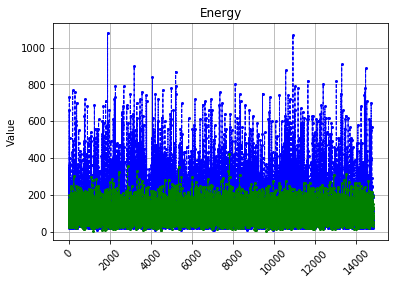

In [212]:
plot_trend(pred, y_train, 'Energy')

In [280]:
pred = lm.predict(X_test)
mae,mape,rmse,r2 = determineAnalysis(y_test, pred, lm)
summary_test['Linear'] = [mae,mape,rmse,r2]

Mean absolute error is  52.063484506
Mean absolute percentage error is  60.313165814
Root mean squared error is  90.22284364295835
RSquare is  0.174675566567


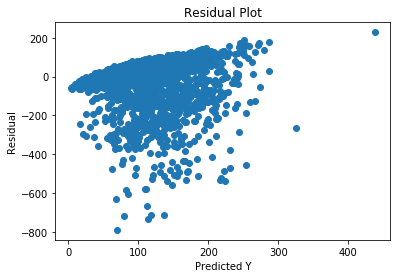

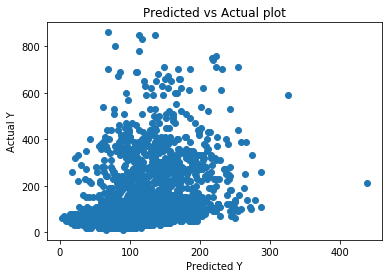

In [214]:
plotResidual(pred, y_test)
plotActual(pred, y_test)

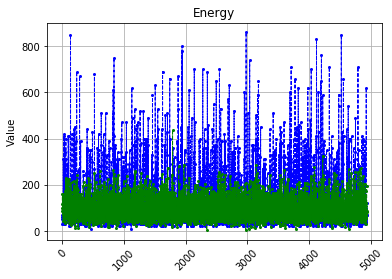

In [215]:
plot_trend(pred,y_test,'Energy')

# Random Forest

In [274]:
regressor = RandomForestRegressor(n_estimators=300, n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [275]:
pred = regressor.predict(X_train)
mae,mape,rmse,r2 = determineAnalysis(y_train, pred, regressor)
summary['RandomForest'] = [mae,mape,rmse,r2]

Mean absolute error is  12.6469810598
Mean absolute percentage error is  12.7014098877
Root mean squared error is  26.562543669840675
RSquare is  0.934222842979


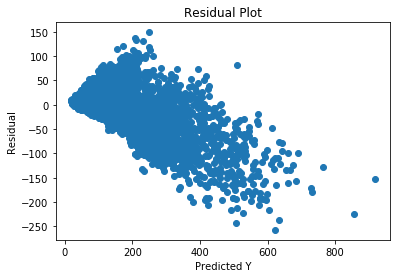

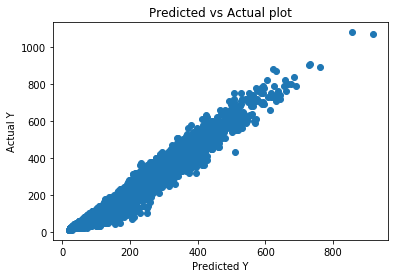

In [218]:
plotResidual(pred, y_train)
plotActual(pred, y_train)

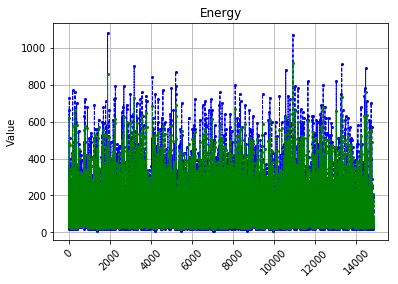

In [219]:
plot_trend(pred, y_train, 'Energy')

In [281]:
pred = regressor.predict(X_test)
mae,mape,rmse,r2 = determineAnalysis(y_test, pred, regressor)
summary_test['RandomForest'] = [mae,mape,rmse,r2]

Mean absolute error is  32.3041278206
Mean absolute percentage error is  32.8295511574
Root mean squared error is  67.16308086242587
RSquare is  0.542645560073


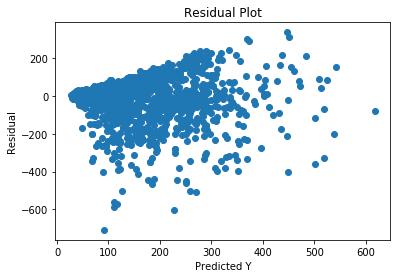

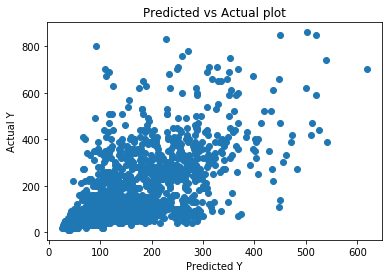

In [221]:
plotResidual(pred, y_test)
plotActual(pred, y_test)

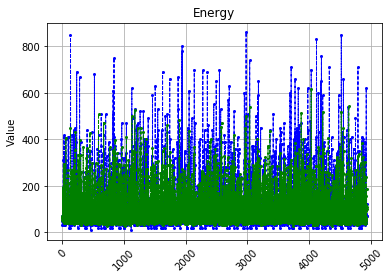

In [222]:
plot_trend(pred, y_test, 'Energy')

# Neural Network

In [276]:
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50),max_iter=1000)
mlp.fit(X_train,y_train)
train_predict=mlp.predict(X_train)
mae,mape,rmse,r2 = determineAnalysis(y_train, train_predict, mlp)
summary['NeuralNetwork'] = [mae,mape,rmse,r2]

Mean absolute error is  37.594545698
Mean absolute percentage error is  39.9627680977
Root mean squared error is  72.39388283437506
RSquare is  0.511415689073


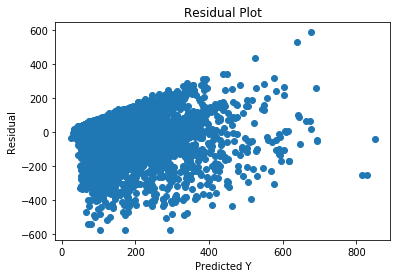

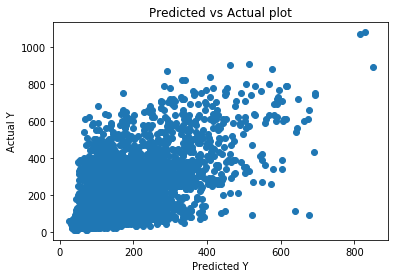

In [224]:
plotResidual(train_predict, y_train)
plotActual(train_predict, y_train)

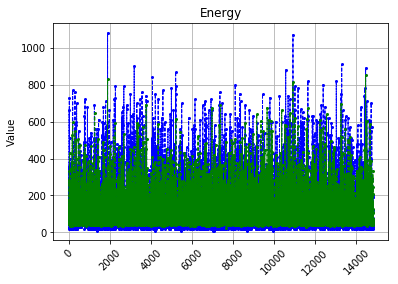

In [225]:
plot_trend(train_predict, y_train, 'Energy')

In [282]:
test_predict=mlp.predict(X_test)
mae,mape,rmse,r2 = determineAnalysis(y_test, test_predict, mlp)
summary_test['NeuralNetwork'] = [mae,mape,rmse,r2]

Mean absolute error is  40.9011946521
Mean absolute percentage error is  41.7720174301
Root mean squared error is  80.35528183705337
RSquare is  0.345332867682


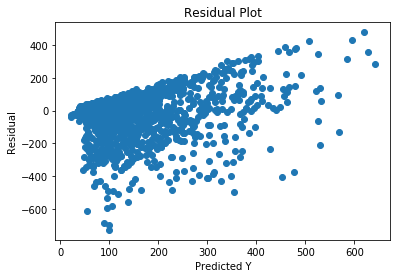

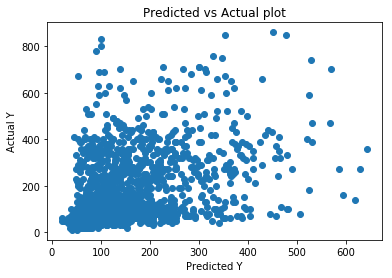

In [227]:
plotResidual(test_predict, y_test)
plotActual(test_predict, y_test)

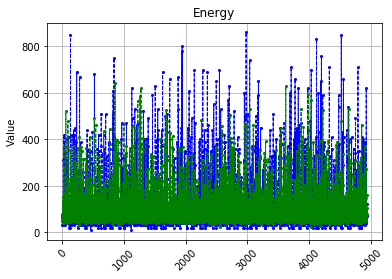

In [228]:
plot_trend(test_predict, y_test, 'Energy')

# Gradient Boosting Machine

In [277]:
est = GradientBoostingRegressor(n_estimators=1500,max_depth=5).fit(X_train, y_train)
train_predict= est.predict(X_train)
mae,mape,rmse,r2 = determineAnalysis(y_train, train_predict, est)
summary['GradientBoosting'] = [mae,mape,rmse,r2]

Mean absolute error is  10.3867935887
Mean absolute percentage error is  14.6219112622
Root mean squared error is  15.176063691833116
RSquare is  0.978528911744


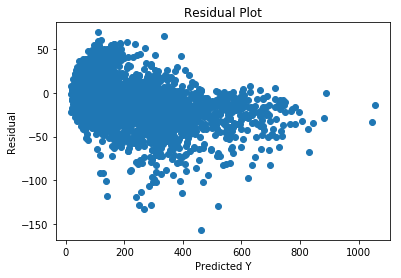

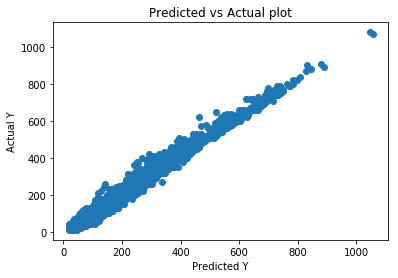

In [236]:
plotResidual(train_predict, y_train)
plotActual(train_predict, y_train)

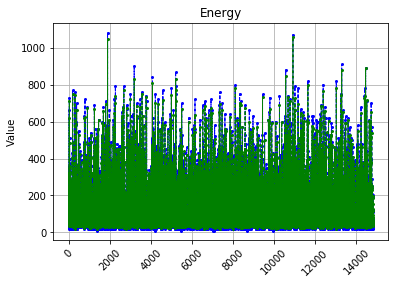

In [237]:
plot_trend(train_predict, y_train, 'Energy')

In [283]:
test_predict= est.predict(X_test)
mae,mape,rmse,r2 = determineAnalysis(y_test, test_predict, est)
summary_test['GradientBoosting'] = [mae,mape,rmse,r2]

Mean absolute error is  34.1037414776
Mean absolute percentage error is  36.2791939974
Root mean squared error is  66.3134261985042
RSquare is  0.554144001018


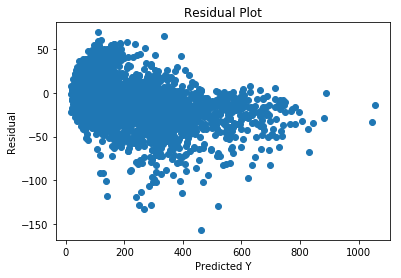

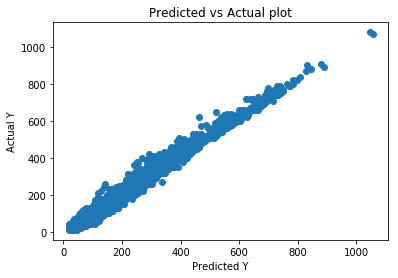

In [239]:
plotResidual(test_predict, y_train)
plotActual(test_predict, y_train)

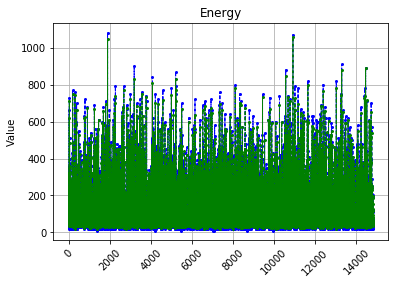

In [240]:
plot_trend(test_predict, y_train, 'Energy')

# Summary

In [291]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

display_side_by_side(summary, summary_test)

,Linear,RandomForest,NeuralNetwork,GradientBoosting
MAE,53.204941,12.646981,37.594546,10.386794
MAPE,61.377133,12.701410,39.962768,14.621911
RMSE,94.338395,26.562544,72.393883,15.176064
R2,0.170316,0.934223,0.511416,0.978529
,Linear,RandomForest,NeuralNetwork,GradientBoosting
MAE,52.063485,32.304128,40.901195,34.103741
MAPE,60.313166,32.829551,41.772017,36.279194
RMSE,90.222844,67.163081,80.355282,66.313426
R2,0.174676,0.542646,0.345333,0.554144
